# <div style="text-align: center"> Proyecto **Google Maps Research**</div>

### <div style="text-align: justify"> Lo que se pretende hacer en esta ocacion es generar una aplicacion, que permita extraer los tiempos y distancia de viajes para un conjunto de datos de entrada. </div> 

### <div Style='text-align: justify'> La motivacion para el desarrollo de este proyecto surge de la necesidad de reforzar algunos nuevos conceptos.</div> 


Estos en particular son:
- Extraccion de datos de paginas web (**Selenium**)
- Desarrollo de aplicaciones (**PyQt5-designer**)


### <div style='text-align: justify; margin-top:1cm'> Asimismo, este proyecto parte desde la base de que es factible de realizarse, puesto que, cuando me encontraba trabajando en mi tesis de titulo, elabore un codigo similar para la extraccion de distancias entre varias locaciones.</div>

    
    

## <div style = 'text-align: justify'> En consecuencia, en este cuadernillo pretendo cubrir parte de la funcionalidad de la aplicacion. </div>
### <div style = 'text-align: justify'> Mas concretamente, todos aquellos **aspectos relacionados con la busqueda y extraccion de datos de Google Maps**.</div>

In [1]:
# primero importemos las bibliotecas que vamos a utilizar
import pandas as pd
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait


### <div style = 'text-align: left'> Lo siguiente que hice fue generar un archivo que contenga locaciones origen-destino que nos sirva para experimentar (origen_destino_de_prueba.xlsx). </div>
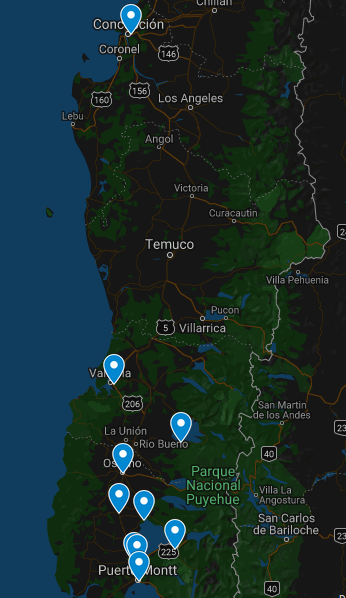
<div style='text-align:center'> Representacion de las locaciones contenidas en el archivo</div>

In [2]:
# Ahora, carguemos el archivo
## este metodo es para cargarlo de forma local (todo tiene que estar en una misma carpeta)
#ruta = os.getcwd()
#archivo = 'origen_destino_de_prueba.xlsx'

## Esto otro metodo es para cargar el archivo desde mi cuenta de github
### ojo: que toda la aplicacion esta hecha para fucionar con archivos .xlsx
### en esta parte lo hare con .csv solo para mostrar el funcionamiento

ruta = 'https://raw.githubusercontent.com/raaraya1/Personal-Proyects/main/Proyectos/Google%20Maps%20Research/origen_destino_de_prueba.csv'
df = pd.read_csv(ruta, sep=';', header=None, names=['origen', 'destino'])
df
                

,origen,destino
0,"-41.319428, -72.988576","-41.319428, -72.988576"
1,"-41.319428, -72.988576","-41.333551, -72.964070"
2,"-41.319428, -72.988576","-41.472136, -72.940394"
3,"-41.319428, -72.988576","-41.212923, -72.545460"
4,"-41.319428, -72.988576","-40.974946, -72.883882"
...,...,...
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN


In [3]:
# Por alguna razon me aparecen algunas filas extra en el archivo, asi que simplemente cortare 
# el dataframe hasta la seccion sin errores

df = df[:10]
df

,origen,destino
0,"-41.319428, -72.988576","-41.319428, -72.988576"
1,"-41.319428, -72.988576","-41.333551, -72.964070"
2,"-41.319428, -72.988576","-41.472136, -72.940394"
3,"-41.319428, -72.988576","-41.212923, -72.545460"
4,"-41.319428, -72.988576","-40.974946, -72.883882"
5,"-41.319428, -72.988576","-40.913432, -73.159804"
6,"-41.319428, -72.988576","-40.580283, -73.109887"
7,"-41.319428, -72.988576","-40.322364, -72.478941"
8,"-41.319428, -72.988576","-39.836906, -73.208262"
9,"-41.319428, -72.988576","-36.817464, -73.027056"


In [4]:
# Ahora, es turno de realizar la busqueda y generar las nuevas columnas (distancias y tiempo)
## Por este motivo, en esta seccion usaremos la biblioteca de selenium para investigar y extraer 
## las distancias y tiempos de viaje

# Abramos el navegador (voy a usar firefox)
## nota: es necesario contar con el navegador de firefox y el archivo 'geckodrive.exe'.
## Aqui dejo un enlace para descargarlo: https://github.com/mozilla/geckodriver/releases
## Este ultimo debe estar contenido en la misma carpeta que este cuadernillo.
driver = webdriver.Firefox()
driver.get('https://www.google.cl/maps')

# Hagamos la primera busqueda a mano 
## Notemos que la primera busqueda tiene un origen igual a su destino
origen = df['origen'][0]
destino = df['destino'][0]
#print(origen)  # -41.319428, -72.988576 
#print(destino)  # -41.319428, -72.988576 


# Para estos casos especiales pondremos la siguiente condicion 
## Si origen == destino -> distancia=0 y tiempo=0

# Ahora probemos para un caso distinto 
origen = df['origen'][3]
destino = df['destino'][8]
#print(origen)    # -41.319428, -72.988576 
#print(destino)   #  -39.836906, -73.208262 


# Notemos la estructura de la ruta de busqueda
## https://www.google.cl/maps/dir/+-41.319428,+-72.988576+/+-39.836906,+-73.208262+/@-40.567256,-73.0506017,8z/data=!4m9!4m8!1m3!2m2!1d-72.988576!2d-41.319428!1m3!2m2!1d-73.208262!2d-39.836906


### <div style='text-align:justify'>Notemos que el enlace al cual nos redirecciono la pagina contiene las coordenadas que dimos como entrada. </div>

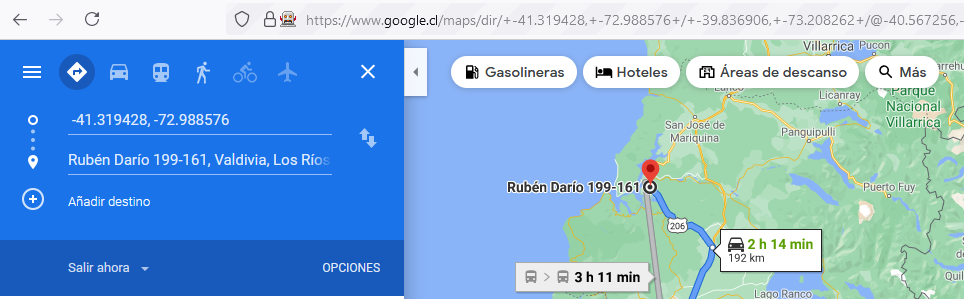

<div style='text-align: center; margin-bottom:1cm'>Enlace:https://www.google.cl/maps/dir/+-41.319428,+-72.988576+/+-39.836906,+-73.208262+/@-40.567256,-73.0506017,8z/data=!4m9!4m8!1m3!2m2!1d-72.988576!2d-41.319428!1m3!2m2!1d-73.208262!2d-39.836906</div>

## <div style='text-align: center'> ¿Que sucede si recortamos un poco el enlace? </div>

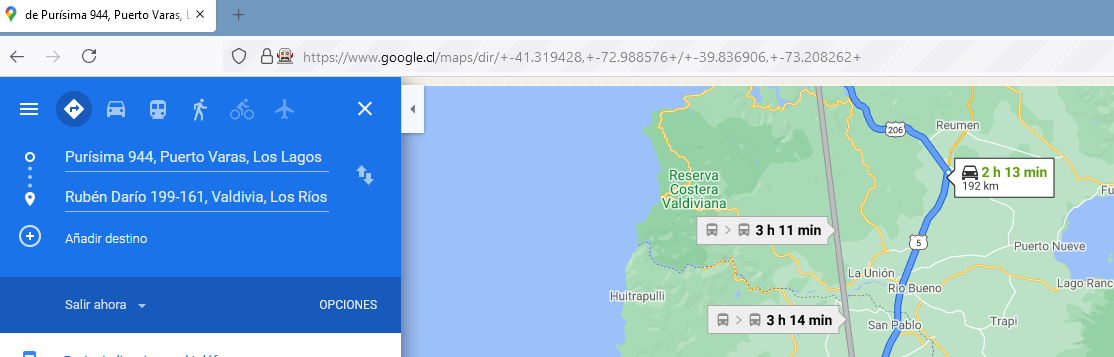
<div style='text-align: center; margin-bottom:1cm'>Enlace recortado: https://www.google.cl/maps/dir/+-41.319428,+-72.988576+/+-39.836906,+-73.208262+</div>

## <div style='text-align: center'> Bien, de esta manera rescatamos una **estructura base** de como efectuar las busquedas.</div>

In [16]:
# Ahora, probemos a abrir esta pagina generando el enlace recortado
origen = str(df['origen'][6]).replace(' ', '+')
destino = str(df['destino'][7]).replace(' ', '+')
enlace_recortado = 'https://www.google.cl/maps/dir/{}/{}'.format(origen, destino)
print(enlace_recortado)

# Abramos la pagina
driver.get(enlace_recortado)


https://www.google.cl/maps/dir/+-41.319428,+-72.988576+/+-40.322364,+-72.478941+


## <div style='text-align:center; margin-button:1cm'> Ahora enfoquemonos en inspeccionar las salidas de los que nos interesa (**tiempo de viaje y distancia**) </div>

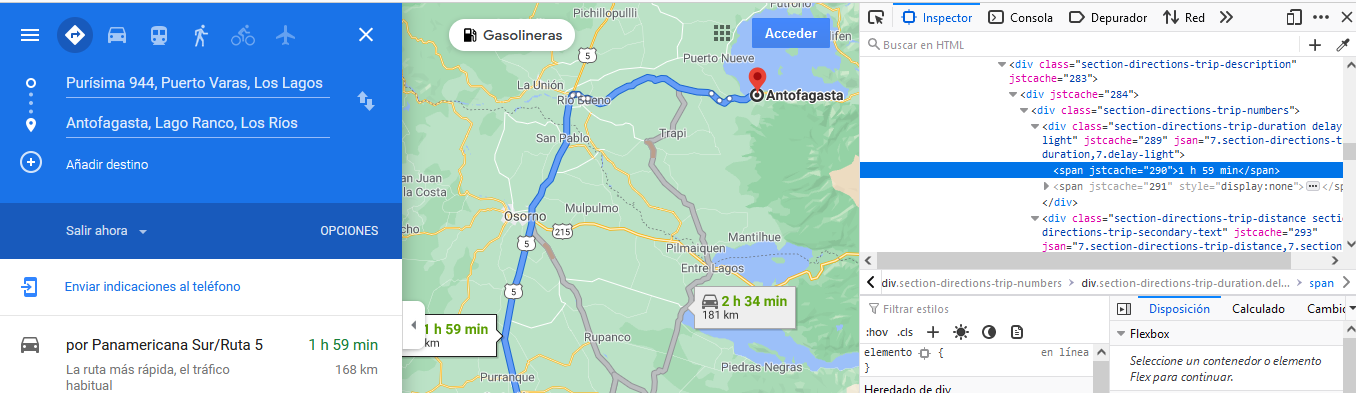
<div style='text-align:center; margin-bottom:1cm'> Inspeccion del tiempo de viaje. </div>


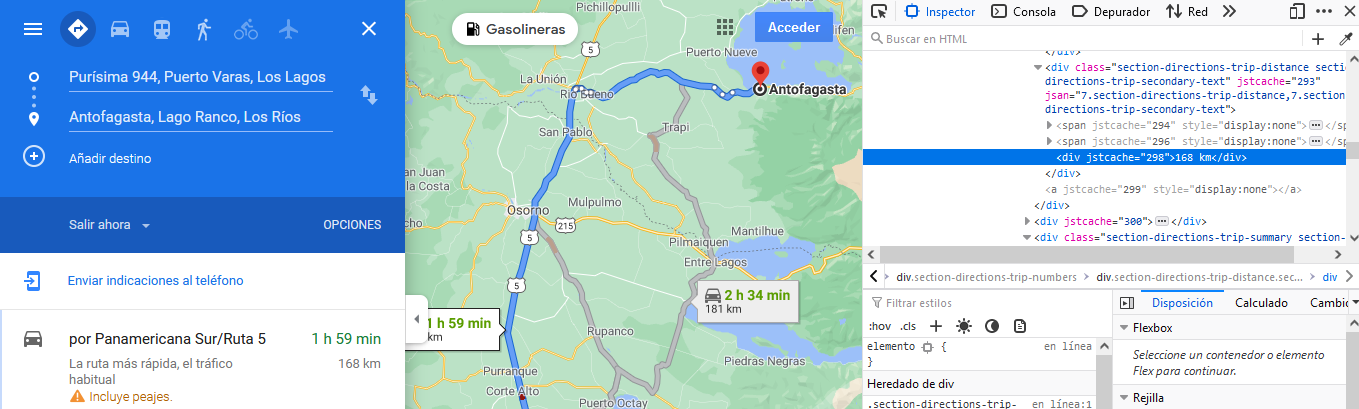
<div style='text-align:center; margin-bottom:1cm'> Inpeccion para la distancia. </div>


In [6]:
# Algo que es sumamente importante antes de continuar es esperar a que los elementos de la pagina web
# se terminen de cargar

WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'span[jstcache="290"]')))
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div[class="section-directions-trip-duration delay-light"]')))

# Ojo que estas condiciones no funcionan para cualquier locacion.


<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="80a9753a-762e-4daa-b38f-3594cc2f3570", element="87382f76-ed03-4ea0-af21-6f792c3e1e36")>

In [17]:
# Ahora, rescatemos el tiempo de viaje (esta condicion si sirve para cualquie locacion)
# extraido de la web: div class="section-directions-trip-numbers"
tiempo = driver.find_elements_by_tag_name('div[class="section-directions-trip-numbers"]')[0].text
print(tiempo)

2 h 3 min
168 km


In [12]:
# Ahora, rescatemos la distancia (esta condicion si sirve para cualquie locacion)
distancia = driver.find_elements_by_tag_name('div[class="section-directions-trip-distance section-directions-trip-secondary-text"]')[0].text
print(distancia)

168 km


In [14]:
# Ahora, automatizemos este proceso
tiempos = []
distancias = [] 
# abrimos el navegador
driver = webdriver.Firefox()
# por ahora solo voy a ir con los primeros 3 (ojo que toma su tiempo)
for fila in range(3):    
    # generar el enlace
    origen = str(df['origen'][fila]).replace(' ', '+')
    destino = str(df['destino'][fila]).replace(' ', '+')
    enlace_recortado = 'https://www.google.cl/maps/dir/{}/{}'.format(origen, destino)
    #print(enlace_recortado)
    
    if origen == destino:
        tiempos.append('0')
        distancias.append('0')
    else:    
        # cargar la pagina
        driver.get(enlace_recortado)
        # esperar a que se carguen los elementos
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div[class="section-directions-trip-numbers"]')))
        # obtener tiempo de viaje
        tiempo = driver.find_elements_by_tag_name('div[class="section-directions-trip-numbers"]')[0].text
        tiempos.append(tiempo)
        # esperar a que se carguen los elementos
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div[class="section-directions-trip-distance section-directions-trip-secondary-text"]')))
        # obtener distancia de viaje        
        distancia = driver.find_elements_by_tag_name('div[class="section-directions-trip-distance section-directions-trip-secondary-text"]')[0].text
        distancias.append(distancia)  

print(tiempos)
print(distancias)
    

['0', '10 min\n3,5 km', '29 min\n21,9 km']
['0', '3,5 km', '21,9 km']


In [110]:
print(tiempos)
print(distancias)

# voy a hacer un DataFrame mas pequeño
mdb = 0
mdb = df[:3]
mdb['tiempos'] = tiempos
mdb['distancias'] = distancias
mdb

['0', '9 min', '25 min']
['0', '3,5 km', '21,9 km']


<ipython-input-110-58665ba2ccb1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdb['tiempos'] = tiempos
<ipython-input-110-58665ba2ccb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdb['distancias'] = distancias


,origen,destino,tiempos,distancias
0,"-41.319428, -72.988576","-41.319428, -72.988576",0,0
1,"-41.319428, -72.988576","-41.333551, -72.964070",9 min,"3,5 km"
2,"-41.319428, -72.988576","-41.472136, -72.940394",25 min,"21,9 km"


## <div style='text-align:center'> Lo que nos queda es generar el **archivo de salida** con los resultados. </div>


In [112]:
# para cerrar el buscador
#driver.close()

# generar el archivo
with open('output.xlsx', 'w') as fp:
    pass

# guardar la info en el excel
mdb.to_excel(ruta + '/' + 'output.xlsx')


## <div style='text-align:center'> **Terminamos**. Asi es como se ve nuestro archivo de salida </div>
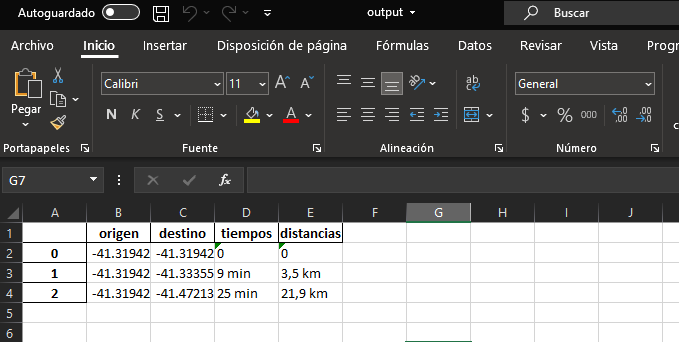
<div style='text-align:center'> Contenido del archivo 'output.xlsx' </div>

## <div style='text-align:center'> **Notas adicionales** (Errores) </div>

####  <div style='text-align:justify'>1) No se puede llegar a escoger lugares tan aleatoriamente en el mapa.</div>
**<div style='text-align:center; margin-bottom:1cm'>Revisar previamente que exista acceso entre las localidades</div>**

####  <div style='text-align:justify'>2) Para el desarrollo de la aplicacion, se utilizo el siguiente codigo para extraer el tiempo de viaje.</div>

    tiempo = driver.find_elements_by_tag_name('div[class="section-directions-trip-numbers"]')[0].text

<div style='text-align:justify; margin-top:1cm; margin-bottom:1cm'>Sucede que esta linea de codigo ahora esta incluyendo el valor de las distancias. Por esta razon, una forma sencilla de arreglarlo es sustituyendo lo anterior por lo siguiente.</div>

    valor = driver.find_elements_by_tag_name('div[class="section-directions-trip-numbers"]')[0].text
    tiempo, distancia = valor.split('\n')
